In [76]:
import csv
from datetime import datetime as dt
import requests as r

In [77]:
url = "https://api.covid19api.com/country/brazil"

req = r.get(url)

if req.status_code == 200:
    print("OK!")
else:
    print("ERROR!")


OK!


In [78]:
dados = req.json()

In [79]:
#header
final_data = [["Confirmados", "Mortes", "Recuperados", "Ativos", "Data"]]

#popula a lista
for v in dados:
    final_data.append([v["Confirmed"], v["Deaths"], v["Recovered"], v["Active"], v["Date"][:10]])
final_data


[['Confirmados', 'Mortes', 'Recuperados', 'Ativos', 'Data'],
 [0, 0, 0, 0, '2020-01-22'],
 [0, 0, 0, 0, '2020-01-23'],
 [0, 0, 0, 0, '2020-01-24'],
 [0, 0, 0, 0, '2020-01-25'],
 [0, 0, 0, 0, '2020-01-26'],
 [0, 0, 0, 0, '2020-01-27'],
 [0, 0, 0, 0, '2020-01-28'],
 [0, 0, 0, 0, '2020-01-29'],
 [0, 0, 0, 0, '2020-01-30'],
 [0, 0, 0, 0, '2020-01-31'],
 [0, 0, 0, 0, '2020-02-01'],
 [0, 0, 0, 0, '2020-02-02'],
 [0, 0, 0, 0, '2020-02-03'],
 [0, 0, 0, 0, '2020-02-04'],
 [0, 0, 0, 0, '2020-02-05'],
 [0, 0, 0, 0, '2020-02-06'],
 [0, 0, 0, 0, '2020-02-07'],
 [0, 0, 0, 0, '2020-02-08'],
 [0, 0, 0, 0, '2020-02-09'],
 [0, 0, 0, 0, '2020-02-10'],
 [0, 0, 0, 0, '2020-02-11'],
 [0, 0, 0, 0, '2020-02-12'],
 [0, 0, 0, 0, '2020-02-13'],
 [0, 0, 0, 0, '2020-02-14'],
 [0, 0, 0, 0, '2020-02-15'],
 [0, 0, 0, 0, '2020-02-16'],
 [0, 0, 0, 0, '2020-02-17'],
 [0, 0, 0, 0, '2020-02-18'],
 [0, 0, 0, 0, '2020-02-19'],
 [0, 0, 0, 0, '2020-02-20'],
 [0, 0, 0, 0, '2020-02-21'],
 [0, 0, 0, 0, '2020-02-22'],
 [0, 0, 0, 

In [80]:
#variaveis auxiliar para manuseio da lista
CONFIRMADOS = 0
MORTES = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

In [81]:
#transforma a lista em csv
with open("brasil_covid_mortes_confirmados.csv", "w", newline="", encoding="UTF-8") as file:
    writer = csv.writer(file)
    writer.writerows(final_data)

In [82]:
#converte a data para um valor data
for i in range(1, len(final_data)):
    final_data[i][DATA] = dt.strptime(final_data[i][DATA], "%Y-%m-%d").date()


In [83]:
#função que une os dados e os labels
def get_dataset(y, labels):
    if type(y) == list:
        dataset = []
        for i in range(len(y)):
            dataset.append({
                "label": labels[i],
                "data": y[i]
            })
        return dataset
    else:
        return [{
            "label": labels[0],
            "data": y
        }]

In [84]:
#função para definir o titulo
def set_title(title=""):
    if title != "":
        display = "true"
    else:
        display = "false"
    
    return {
        "title": title,
        "display": display
    }

In [85]:
#função que cria e retorna o grafico
def create_chart(x, y, labels, kind="bar", title=""):
    
    datasets = get_dataset(y, labels)
    options = set_title(title)
    
    chart = {
        "type": kind,
        "data": {
            "labels": x,
            "datasets": datasets
        },
        "options": options
    }
    
    return chart

In [86]:
#faz a requisação do grafico montado para a api que retorna o conteudo
def get_api_chart(chart):
    url_base = "https://quickchart.io/chart"
    req = r.get(f"{url_base}?backgroundColor=transparent&c={str(chart)}")
    return req.content

In [87]:
#salva a imagem do gráfico no computador
def save_image(path, content):
    with open(path, "wb") as image:
        image.write(content)

In [88]:
#biblioteca responsável pela geração de imagens
!pip install Pillow
from PIL import Image
from IPython.display import display

In [89]:
#exibe a imagem no programa
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

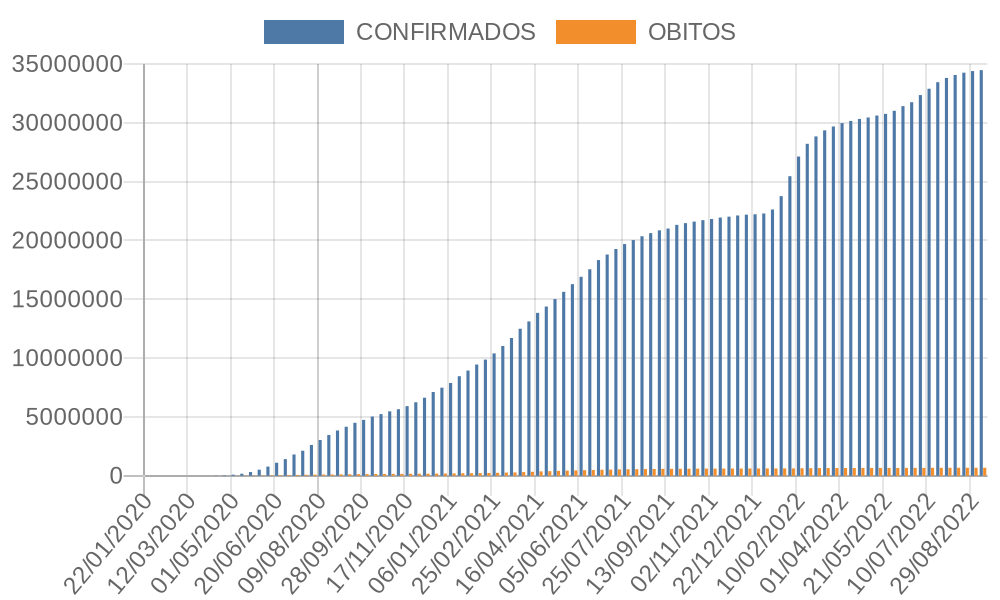

In [90]:
y_data1 = []
for v in final_data[1::10]:
    y_data1.append(v[CONFIRMADOS])

y_data2 = []
for v in final_data[1::10]:
    y_data2.append(v[MORTES])

labels = ["CONFIRMADOS", "OBITOS"]

x = []
for v in final_data[1::10]:
    x.append(v[DATA].strftime("%d/%m/%Y"))

chart = create_chart(x, [y_data1, y_data2], labels, title="Gráfico confirmados e obitos")
chart_content = get_api_chart(chart)
save_image("confirmados-mortes-COVID.png", chart_content)
display_image("confirmados-mortes-COVID.png")
    